# Topic Modelling on Social Media data

[![Open in Colab] (https://colab.research.google.com/assets/colab-badge.svg) ](https://colab.research.google.com/drive/1cKq5yeW94RqsZl6LLHaQHBpk29GrvrJS#scrollTo=FAU2L4YZfW4r)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import string

## Loading data

In [4]:
!wget "https://github.com/sanyamjain0315/topic-modelling-sample/blob/main/new_tweets_2021_to_24.csv"

--2024-09-30 17:37:07--  https://github.com/sanyamjain0315/topic-modelling-sample/blob/main/new_tweets_2021_to_24.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘new_tweets_2021_to_24.csv’

new_tweets_2021_to_     [ <=>                ] 294.14K  --.-KB/s    in 0.1s    

2024-09-30 17:37:08 (2.92 MB/s) - ‘new_tweets_2021_to_24.csv’ saved [301196]



In [ ]:
df = pd.read_csv("new_tweets_2021_to_24.csv")
print("No of rows: ",len(df))
df.columns

No of rows:  21066


Index(['id', 'date', 'userid', 'userfollowersCount', 'userfriendsCount',
       'userstatusesCount', 'userfavouritesCount', 'userlistedCount',
       'usermediaCount', 'userlocation', 'rawContent', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'hashtags', 'viewCount',
       'quote_id', 'quote_date', 'quote_userid', 'quote_userfollowersCount',
       'quote_userfriendsCount', 'quote_userstatusesCount',
       'quote_userfavouritesCount', 'quote_userlistedCount',
       'quote_usermediaCount', 'quote_userlocation', 'quote_rawContent',
       'quote_replyCount', 'quote_retweetCount', 'quote_likeCount',
       'quote_quoteCount', 'quote_hashtags', 'quote_viewCount'],
      dtype='object')

In [ ]:
df['rawContent']

,rawContent
0,"Even as the countdown for civic polls begins, ..."
1,Futuristic Dubai dreams of hyperloop transit t...
2,@mamba_aka It’s crazy already there.\nAI self ...
3,#GAMING #REVIEW\n#GravityChase on #XboxOne\n\n...
4,—\nThe team wishes everyone a happy new year! ...
...,...
21061,Dumbest people on the planet https://t.co/ORP0...
21062,I am reading yet another discussion about Elon...
21063,how many of these projects need to fail/be sup...
21064,the idea behind the hyperloop is that its a pa...


In [ ]:
df = df.iloc[:5000]
print("No of rows: ",len(df))
df['rawContent']

No of rows:  5000


,rawContent
0,"Even as the countdown for civic polls begins, ..."
1,Futuristic Dubai dreams of hyperloop transit t...
2,@mamba_aka It’s crazy already there.\nAI self ...
3,#GAMING #REVIEW\n#GravityChase on #XboxOne\n\n...
4,—\nThe team wishes everyone a happy new year! ...
...,...
4995,What’s faster than autonomous vehicles and fly...
4996,"I call it ""The Hyperloop"""
4997,"I need an Apc/Buharists membership card, learn..."
4998,HyperLoop Dungun will create RM600B GDP and 1....


## Preprocessing

In [ ]:
def clean_text(text):
 text = text.lower()

 # Removing text in square brackets
 text = re.sub(r'\[.*?\]', '', text)

 # Removing punctuation
 text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

 # Remove words containing numbers
 text = re.sub(r'\w*\d\w*', '', text)

 # Removing mentions and tags
 text = re.sub(r'@\S*', '', text)

 return text

df['text'] = df['rawContent'].apply(clean_text)

In [ ]:
def get_number_of_urls(documents):
    print("{:.2f}% of documents contain urls".format(sum
(documents.apply(lambda x:x.find('http'))>0)/len
(documents)*100))

print(get_number_of_urls(df.text))

12.38% of documents contain urls
None


In [ ]:
df[['rawContent','text']]

,rawContent,text
0,"Even as the countdown for civic polls begins, ...",even as the countdown for civic polls begins a...
1,Futuristic Dubai dreams of hyperloop transit t...,futuristic dubai dreams of hyperloop transit t...
2,@mamba_aka It’s crazy already there.\nAI self ...,mambaaka it’s crazy already there\nai self aut...
3,#GAMING #REVIEW\n#GravityChase on #XboxOne\n\n...,gaming review\ngravitychase on xboxone\n\na fu...
4,—\nThe team wishes everyone a happy new year! ...,—\nthe team wishes everyone a happy new year 🥳...
...,...,...
4995,What’s faster than autonomous vehicles and fly...,what’s faster than autonomous vehicles and fly...
4996,"I call it ""The Hyperloop""",i call it the hyperloop
4997,"I need an Apc/Buharists membership card, learn...",i need an apcbuharists membership card learnt ...
4998,HyperLoop Dungun will create RM600B GDP and 1....,hyperloop dungun will create gdp and million...


## Lemmitization

In [ ]:
import spacy
from nltk.corpus import stopwords

In [ ]:
nlp_module = spacy.load("en_core_web_sm")
print(nlp_module("going")[0].lemma_)
print([word.lemma_ for word in nlp_module("I will get better")])
print([word.lemma_ for word in nlp_module("This is horrible")])

go
['I', 'will', 'get', 'well']
['this', 'be', 'horrible']


In [ ]:
def lemmatize(text):
    sentence = []
    words = nlp_module(text)
    for word in words:
      if word not in stopwords.words('english'):
        sentence.append(word.lemma_)
    return " ".join(sentence)

df['text'] = df['text'].apply(lemmatize)
df['text'] = df['text'].replace('-PRON-', '')

In [ ]:
df[['rawContent','text']]

,rawContent,text
0,"Even as the countdown for civic polls begins, ...",even as the countdown for civic poll begin a q...
1,Futuristic Dubai dreams of hyperloop transit t...,futuristic dubai dream of hyperloop transit tu...
2,@mamba_aka It’s crazy already there.\nAI self ...,mambaaka it ’ crazy already there \n ai self a...
3,#GAMING #REVIEW\n#GravityChase on #XboxOne\n\n...,gaming review \n gravitychase on xboxone \n\n ...
4,—\nThe team wishes everyone a happy new year! ...,— \n the team wish everyone a happy new year 🥳...
...,...,...
4995,What’s faster than autonomous vehicles and fly...,what ’ fast than autonomous vehicle and fly ca...
4996,"I call it ""The Hyperloop""",I call it the hyperloop
4997,"I need an Apc/Buharists membership card, learn...",I need an apcbuharist membership card learn an...
4998,HyperLoop Dungun will create RM600B GDP and 1....,hyperloop dungun will create gdp and milli...


## Parts of Speech (POS) tagging

In [ ]:
import nltk
from nltk import pos_tag
from nltk import RegexpParser
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def poschunking(text, pattern="NP: {<DT>?<JJ>*<NN>+}"):
  tokens_tag = nltk.pos_tag(text.split())  # Assuming text is a string
  # print("After Token:", tokens_tag)

  chunker = nltk.RegexpParser(pattern)
  # print("After Regex:", chunker)

  output_tree = chunker.parse(tokens_tag)
  # print("After Chunking:", output_tree)

  extracted_strings = []
  for subtree in output_tree.subtrees(filter=lambda t: t.label() == 'NP'):
      extracted_string = ' '.join(word for word, _ in subtree.leaves())
      extracted_strings.append(extracted_string)

  # print("Extracted Strings:", extracted_strings)
  combined_string = ' '.join(extracted_strings)
  # print("Combined String:", combined_string)
  return combined_string

df['poschunk'] = df['text'].apply(poschunking)

In [ ]:
df[['rawContent','text', 'poschunk']]

,rawContent,text,poschunk
0,"Even as the countdown for civic polls begins, ...",even as the countdown for civic poll begin a q...,the countdown civic poll a quick reminder mumb...
1,Futuristic Dubai dreams of hyperloop transit t...,futuristic dubai dream of hyperloop transit tu...,futuristic dubai dream hyperloop transit tube ...
2,@mamba_aka It’s crazy already there.\nAI self ...,mambaaka it ’ crazy already there \n ai self a...,mambaaka autonomous car hyperloop renewable en...
3,#GAMING #REVIEW\n#GravityChase on #XboxOne\n\n...,gaming review \n gravitychase on xboxone \n\n ...,review gravitychase xboxone a futuristic racer...
4,—\nThe team wishes everyone a happy new year! ...,— \n the team wish everyone a happy new year 🥳...,the team everyone a happy new year a huge than...
...,...,...,...
4995,What’s faster than autonomous vehicles and fly...,what ’ fast than autonomous vehicle and fly ca...,autonomous vehicle fly car try hyperloop rocke...
4996,"I call it ""The Hyperloop""",I call it the hyperloop,the hyperloop
4997,"I need an Apc/Buharists membership card, learn...",I need an apcbuharist membership card learn an...,an apcbuharist membership card anyone the card...
4998,HyperLoop Dungun will create RM600B GDP and 1....,hyperloop dungun will create gdp and milli...,hyperloop dungun job cost fish cheap emission ton


## Analysis

### Tweets length

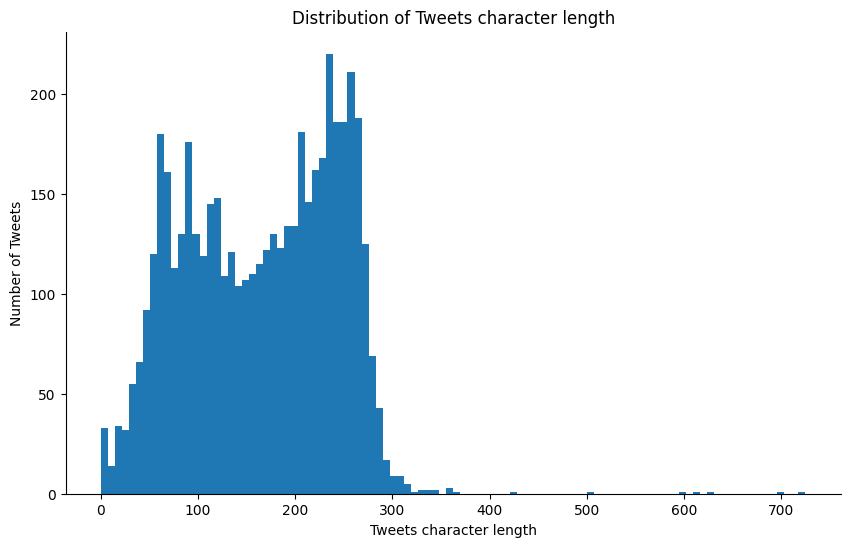

In [ ]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine()

### Word Cloud

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

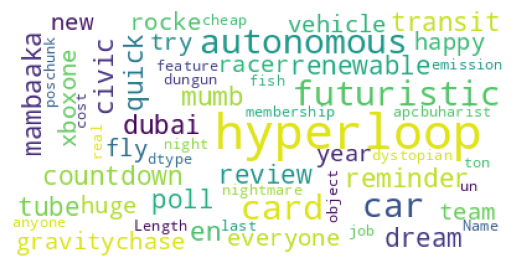

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
  background_color='white',
  stopwords=stopwords,
  max_words=500,
  max_font_size=40,
  random_state=100
  ).generate(str(df.poschunk))
plt.imshow(wordcloud)
plt.axis('off')

### Unigram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def get_top_n_words(corpus, n=None):
  vectorizer = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vectorizer.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


common_words = get_top_n_words(df.poschunk, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram

,unigram,count
0,hyperloop,4249
1,transportation,460
2,technology,448
3,future,400
4,virgin,365
5,new,317
6,elon,311
7,musk,299
8,innovation,298
9,train,295


### Trigram

In [ ]:
def get_top_n_trigram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


common_words = get_top_n_trigram(df.poschunk, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram

,trigram,count
0,high speed rail,64
1,elon musk hyperloop,43
2,european hyperloop week,28
3,world metro map,27
4,zaha hadid architect,23
5,hyperloop technology engineering,22
6,tomorrow world metro,21
7,metro map machinelearne,21
8,map machinelearne engineering,21
9,swissloop hyperloop technology,21


## Topic Modelling

In [ ]:
!pip install -Uq pyldavis gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [ ]:
vectorizer = CountVectorizer(
  analyzer='word',
  min_df=3,
  stop_words='english',
  lowercase=True,
  token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
  max_features=5000,
)

data_matrix = vectorizer.fit_transform(df.poschunk)
data_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<5000x2690 sparse matrix of type '<class 'numpy.int64'>'
	with 41971 stored elements in Compressed Sparse Row format>

In [ ]:
lda_model = LatentDirichletAllocation(
  n_components=10, # Number of topics
  learning_method='online',
  random_state=20,
  n_jobs = -1  # Use all available CPUs
)

lda_output = lda_model.fit_transform(data_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the topic-word distribution matrix
topic_word_distribution = lda_model.components_
topic_word_distribution.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 2690)

In [ ]:
# Normalize the distribution to get probabilities
topic_word_probabilities = topic_word_distribution / topic_word_distribution.sum(axis=1)[:, np.newaxis]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the feature names (terms) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['aayog', 'ableg', 'abu', ..., 'zone', 'zoom', 'zurich'],
      dtype=object)

In [ ]:
# Display term frequencies within selected topics
selected_topics = [0, 1, 2,3,4,5,6,7,8,9]  # Replace with the indices of the topics you're interested in
top_n_terms = 5  # Number of top terms to display for each topic

for topic in selected_topics:
    top_term_indices = topic_word_probabilities[topic].argsort()[:-top_n_terms - 1:-1]
    top_terms = [feature_names[i] for i in top_term_indices]

    print(f"\nTopic {topic}:")
    for term in top_terms:
        term_frequency = data_matrix[:, vectorizer.vocabulary_[term]].sum()
        print(f"{term}:\tOverall Term Frequency = {term_frequency}\tEstimated Frequency = {topic_word_probabilities[topic, vectorizer.vocabulary_[term]]:.4f}")



Topic 0:
hyperloop:	Overall Term Frequency = 4249	Estimated Frequency = 0.0977
tesla:	Overall Term Frequency = 214	Estimated Frequency = 0.0257
train:	Overall Term Frequency = 295	Estimated Frequency = 0.0256
car:	Overall Term Frequency = 216	Estimated Frequency = 0.0212
way:	Overall Term Frequency = 188	Estimated Frequency = 0.0207

Topic 1:
hyperloop:	Overall Term Frequency = 4249	Estimated Frequency = 0.0937
team:	Overall Term Frequency = 236	Estimated Frequency = 0.0416
week:	Overall Term Frequency = 119	Estimated Frequency = 0.0194
student:	Overall Term Frequency = 86	Estimated Frequency = 0.0154
thank:	Overall Term Frequency = 85	Estimated Frequency = 0.0152

Topic 2:
big:	Overall Term Frequency = 75	Estimated Frequency = 0.0417
large:	Overall Term Frequency = 42	Estimated Frequency = 0.0229
hyperloop:	Overall Term Frequency = 4249	Estimated Frequency = 0.0205
trip:	Overall Term Frequency = 35	Estimated Frequency = 0.0204
cleveland:	Overall Term Frequency = 31	Estimated Frequenc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.lda_model.prepare(lda_model, data_matrix, vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.113713 -0.143901       1        1  16.964072
6      0.182111  0.135818       2        1  16.588120
4      0.198022  0.022863       3        1  14.102756
8      0.130412  0.172707       4        1  12.995553
1      0.018900 -0.008253       5        1  11.696231
3      0.009367 -0.078236       6        1   7.367700
9     -0.059295 -0.231643       7        1   6.597316
5     -0.103492 -0.112269       8        1   5.831503
2     -0.196822  0.117255       9        1   4.035039
7     -0.292916  0.125659      10        1   3.821710, topic_info=            Term        Freq       Total Category  logprob  loglift
1583        musk  296.000000  296.000000  Default  30.0000  30.0000
746         elon  308.000000  308.000000  Default  29.0000  29.0000
2429       today  176.000000  176.000000  Default  28.0000  28.0000
1227  innovation  273.000000  273.000000  Default  27.0000  27.0000
2363        team  215.000000  215.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2521      unique   12.896817   19.020256  Topic10  -4.8723   2.8759
1884     propose   14.881743   30.861554  Topic10  -4.7292   2.5351
1359        late   16.580380   56.714794  Topic10  -4.6211   2.0347
710        earth   13.192421   25.951146  Topic10  -4.8497   2.5879
1325         key   12.873582   37.940827  Topic10  -4.8741   2.1836

[473 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7        10  0.905287  acciona
46        1  0.227077      air
46        3  0.772060      air
52        2  0.968056  airport
57        9  0.954109  alberta
...     ...       ...      ...
2678      9  0.950773     zaha
2680      6  0.996899   zelero
2681      3  0.121356  zeleros
2681      5  0.703863  zeleros
2681      6  0.145627  zeleros

[550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 9, 2, 4, 10, 6, 3, 8])

In [ ]:
lda_model.get_params(deep=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 20,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


## Gensim coherence score


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

documents = df['poschunk'].apply(lambda x: x.split())
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

lda_model_gensim = LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=10,
                            random_state=20,
                            passes=10,
                            alpha='auto',
                            per_word_topics=True)

coherence_model_lda = CoherenceModel(model=lda_model_gensim, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.42368690412210236


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


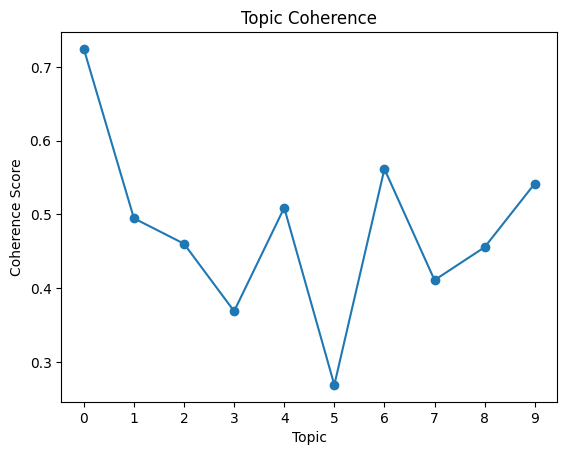

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_topic_coherence(lda_model, corpus, texts, dictionary, topn=10):
    topic_coherences = []
    for i in range(lda_model.num_topics):
        top_words = [word for word, _ in lda_model.show_topic(i, topn=topn)]
        coherence_model_lda = CoherenceModel(topics=[top_words], texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        topic_coherences.append(coherence_score)
    return topic_coherences


topic_coherences = calculate_topic_coherence(lda_model_gensim, corpus, documents, dictionary)

# Plot topic vs coherence
plt.plot(range(len(topic_coherences)), topic_coherences, marker='o')
plt.xlabel("Topic")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence")
plt.xticks(range(len(topic_coherences)))
plt.show()
